In [11]:
# Imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset

from torchsummary import summary
import torchvision as tv
import copy

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###

# # Pytorch Gpu Configuration for Cuda
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pytorch Gpu Configuration for directml(AMD GPU)
import torch_directml

device = torch_directml.device()

# Set default device
torch.set_default_device(device)

In [36]:
# Data import
transform = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize([.5,.5,.5], [.5,.5,.5])])
trainSet = tv.datasets.CIFAR10(root='../Datasets/', train=True, download=True, transform=transform)
devSet = tv.datasets.CIFAR10(root='../Datasets/', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
# Dataset shape
print("Dataset shape: ", trainSet.data.shape, devSet.data.shape, len(trainSet.classes), len(devSet.classes))

# # Data Normalization
# trainSet.data = trainSet.data / np.max(trainSet.data)
# devSet.data = devSet.data / np.max(devSet.data)
# Train/Test set split
# split the devtest into two separate sets
randidx = np.random.permutation(10000)  # a random permutation of indices
t_idx = randidx[:5000]
d_idx = list(set(randidx) - set(t_idx))
trainSet.data
devset = Subset(devSet, d_idx)  # Subset for devset
testset = Subset(devSet, t_idx)  # Subset for test

# transform to dataloaders
batchsize = 32
train_loader = DataLoader(
    trainSet,
    batch_size=batchsize,
    shuffle=True,
    drop_last=True,
    generator=torch.Generator(device=device),
)
dev_loader = DataLoader(
    devset, batch_size=batchsize, generator=torch.Generator(device=device)
)  # note: devtest in batches!
test_loader = DataLoader(
    testset, batch_size=len(testset), generator=torch.Generator(device=device)
)

Dataset shape:  (50000, 32, 32, 3) (10000, 32, 32, 3) 10 10


In [38]:
# check out the shape of the datasets
print("Data shapes (train/dev/test):")
print(len(trainSet))
print(len(devset))
print(len(testset))

# and the range of pixel intensity values
print("\nData value range:")
print((np.min(trainSet.data), np.max(trainSet.data)))

# the unique categories
print("\nData categories:")
print(trainSet.classes)

Data shapes (train/dev/test):
50000
5000
5000

Data value range:
(0, 255)

Data categories:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [39]:
# Uh oh! It looks like the images are the wrong dimensions!
# They need to be 3x32x32.
# And they are not normalized!

# but...
X, y = next(iter(train_loader))

# try again
print("Data shapes (train/test):")
print(X.data.shape)

# and the range of pixel intensity values
print("\nData value range:")
print((torch.min(X.data), torch.max(X.data)))

Data shapes (train/test):
torch.Size([32, 3, 32, 32])

Data value range:
(tensor(-1.), tensor(1.))


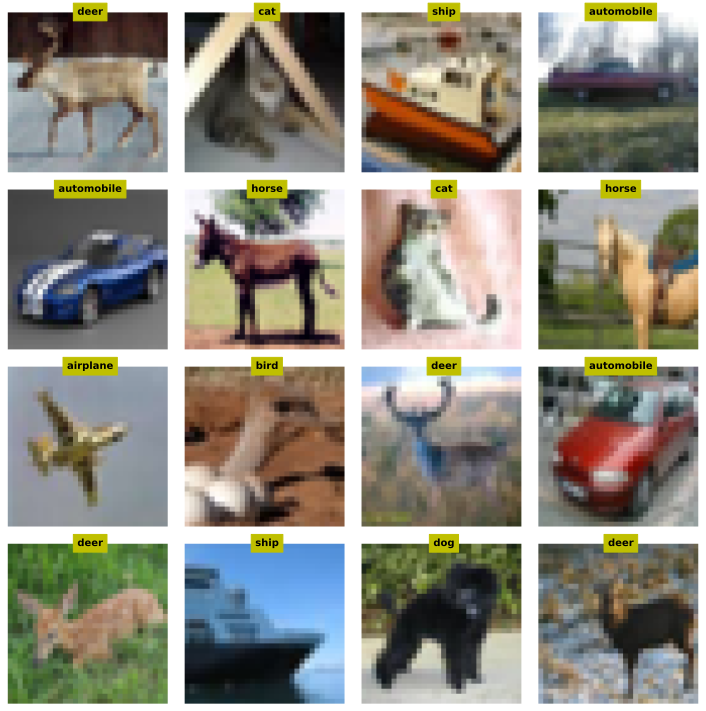

In [41]:
# inspect a few random images

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):

    # extract that image (need to transpose it back to 32x32x3)
    pic = X.data[i].numpy().transpose((1, 2, 0))
    pic = pic / 2 + 0.5  # undo normalization

    # and its label
    label = trainSet.classes[y[i]]

    # and show!
    ax.imshow(pic)
    ax.text(
        16, 0, label, ha="center", fontweight="bold", color="k", backgroundcolor="y"
    )
    ax.axis("off")

plt.tight_layout()
plt.show()